# Advertising

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("D:\\tala\\mashin learning\\Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df["total_spends"]=df["TV"]+df["radio"]+df["newspaper"]

In [5]:
df.head()

,TV,radio,newspaper,sales,total_spends
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_spends', ylabel='sales'>

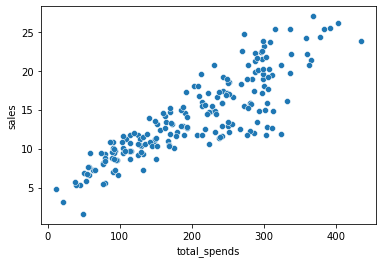

In [6]:
sns.scatterplot(data=df ,x="total_spends" ,y="sales")

<AxesSubplot:xlabel='total_spends', ylabel='sales'>

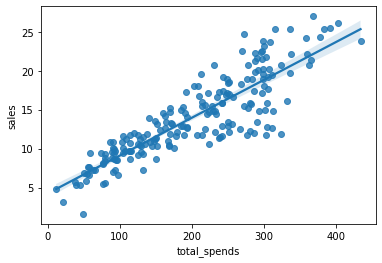

In [7]:
#seaborn by OLS method. OLS(statsmodels)
sns.regplot(data=df ,x="total_spends" , y="sales")

In [8]:
x=df["total_spends"]
y=df["sales"]

In [9]:
#coef_ and intercept_  by numpy 
np.polyfit(x,y,deg=1)# y=b0 +b1*X

array([0.04868788, 4.24302822])

In [10]:
np.polyfit(x,y,deg=3) # y=b0 +b1*X1 +b2*(X2**2)+ b3*(X3**3) this isnt linear

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

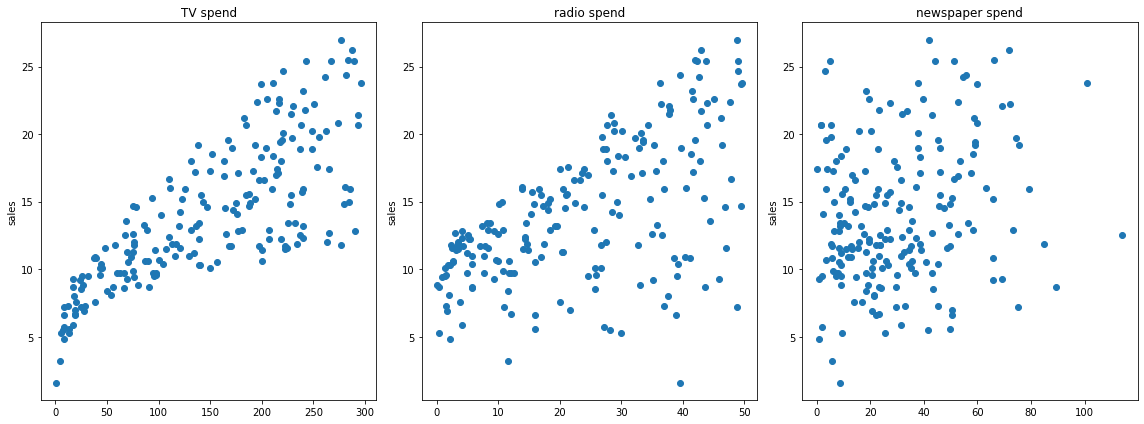

In [11]:
fig ,axes=plt.subplots(nrows=1 , ncols=3 , figsize=(16 ,6))
axes[0].plot(df["TV"] , df["sales"] ,"o")
axes[0].set_ylabel("sales")
axes[0].set_title("TV spend")

axes[1].plot(df["radio"] , df["sales"] ,"o")
axes[1].set_ylabel("sales")
axes[1].set_title("radio spend")

axes[2].plot(df["newspaper"] , df["sales"] ,"o")
axes[2].set_ylabel("sales")
axes[2].set_title("newspaper spend")

plt.tight_layout()

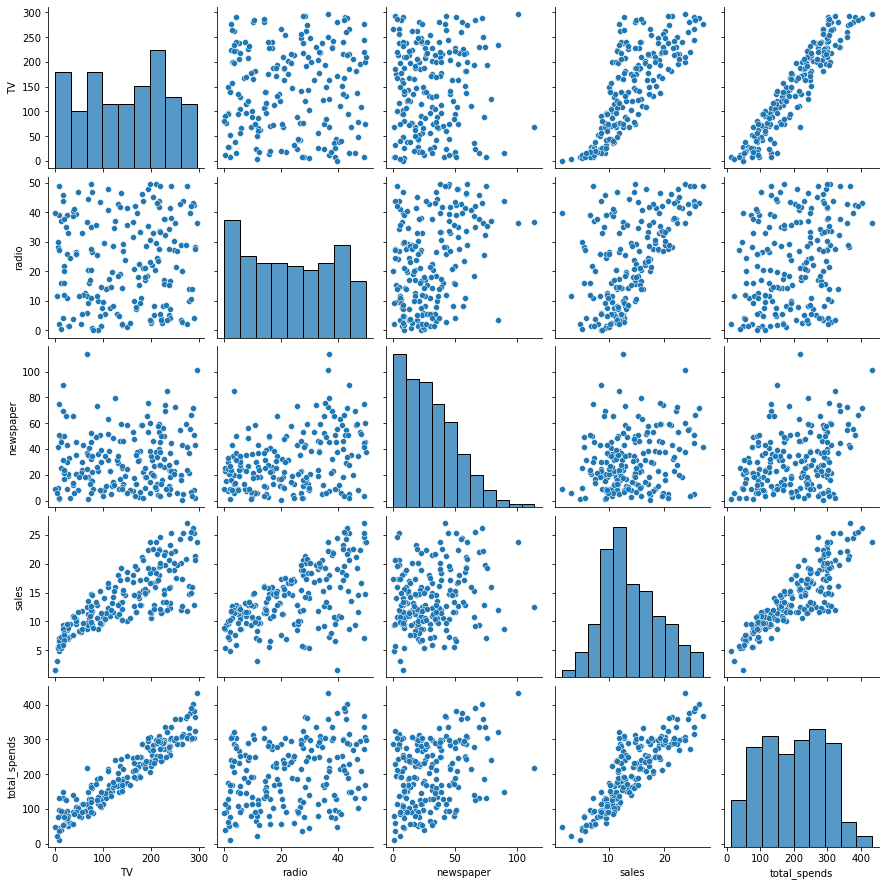

In [12]:
sns.pairplot(df)

In [13]:
df=df.drop(["total_spends"] , axis=1)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [14]:
inputs=df.drop("sales" ,axis=1)
target=df["sales"]

In [15]:
from sklearn.model_selection import train_test_split

x_train ,x_other , y_train , y_other=train_test_split(inputs , target , test_size=0.3 , random_state=42)

# cross validation(hold out test set)

In [16]:
x_valid ,x_test , y_valid , y_test=train_test_split(x_other , y_other , test_size=0.5 , random_state=42)

# linear regression

In [17]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(x_train , y_train)
y_hat=reg.predict(x_valid)

In [18]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error

MAE=mean_absolute_error(y_valid , y_hat)
MSE=mean_squared_error(y_valid , y_hat)
RMSE=np.sqrt(mean_squared_error(y_valid, y_hat))

In [19]:
MAE

1.2082039536758837

In [20]:
MSE

2.5490385687174193

In [21]:
RMSE

1.596570878075076

<AxesSubplot:xlabel='sales', ylabel='Count'>

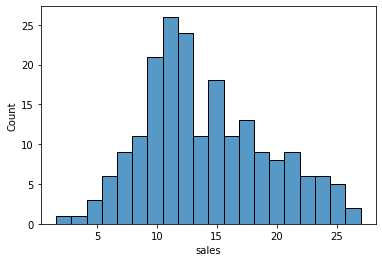

In [22]:
sns.histplot(data=df , x="sales" , bins=20) #bins is number of samples

# residual plot

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales'>

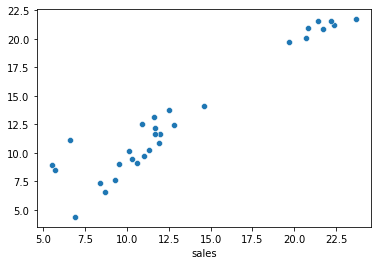

In [23]:
sns.scatterplot(y_valid,y_hat)

<AxesSubplot:xlabel='sales', ylabel='Density'>

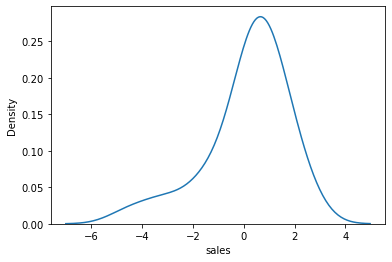

In [24]:
sns.kdeplot(y_valid-y_hat)
#sns.displot(y_valid-y_hat)

# Coefficients

In [25]:
reg.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [26]:
reg.intercept_

2.7089490925159048

In [27]:
#R squared
reg.score(x_train , y_train)

0.9055159502227753

# export and import the files

In [28]:
from joblib import dump

In [29]:
dump(reg,"final_linear_model.joblib")

['final_linear_model.joblib']

In [30]:
from joblib import load

In [31]:
loaded_model=load("final_linear_model.joblib")

In [32]:
loaded_model.coef_

array([0.04405928, 0.1992875 , 0.00688245])

# example

In [33]:
sample=[[10 ,22,18]]
loaded_model.predict(sample)

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.65775097])

# improve our linear regression by polynomial features

In [34]:
#for intraction the features and making more features
from sklearn.preprocessing import PolynomialFeatures

In [35]:
#interaction=True meanse only interaction not degrees AB and not A^2
ploy_converter=PolynomialFeatures(degree=2 , include_bias=False)
ploy_converter.fit(inputs)
poly_feature=ploy_converter.transform(inputs)
#poly_features=ploy_converter.fit_transform(x)

In [36]:
inputs.shape

(200, 3)

In [37]:
poly_feature.shape

(200, 9)

In [38]:
inputs.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [39]:
#TV , radio ,newspaper  , TV^2 , TV*radio  , TV* newspaper  , radio^2  , radio* newspaper , newspaper ^2
poly_feature[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

# splitting our data with new inputs

In [40]:
x_train ,x_other , y_train , y_other=train_test_split(poly_feature , target , test_size=0.3 , random_state=42)

In [41]:
x_valid ,x_test , y_valid , y_test=train_test_split(x_other , y_other , test_size=0.5 , random_state=42)

In [42]:
reg1=LinearRegression()
reg1.fit(x_train , y_train)
y_hat1=reg1.predict(x_valid)

In [43]:
MAE=mean_absolute_error(y_valid , y_hat1)
MSE=mean_squared_error(y_valid , y_hat1)
RMSE=np.sqrt(mean_squared_error(y_valid, y_hat1))

In [44]:
MAE

0.5758126996554548

In [45]:
MSE

0.5247106115424096

In [46]:
RMSE

0.7243691127749785

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales'>

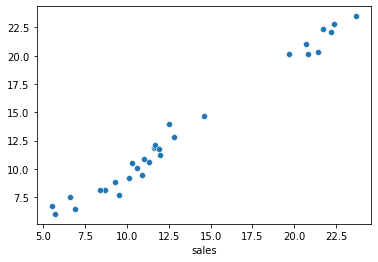

In [47]:
sns.scatterplot(y_valid,y_hat1)

<AxesSubplot:xlabel='sales', ylabel='Density'>

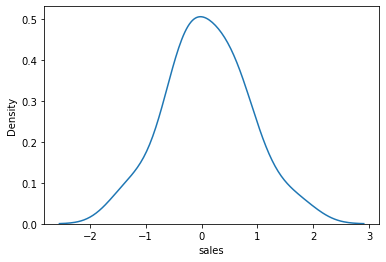

In [48]:
sns.kdeplot(y_valid-y_hat1)

# finding the best degree of our poly model

In [49]:
train_rmse_error=[]
valid_rmse_error=[]

for d in range(1,10):
    ploy_converter=PolynomialFeatures(degree=d , include_bias=False)
    poly_feature=ploy_converter.fit_transform(inputs)
    
    x_train ,x_other , y_train , y_other=train_test_split(poly_feature , target , test_size=0.3 , random_state=42)
    x_valid ,x_test , y_valid , y_test=train_test_split(x_other , y_other , test_size=0.5 , random_state=42)
    reg1=LinearRegression()
    reg1.fit(x_train , y_train)

    train_pred=reg1.predict(x_train)
    valid_pred=reg1.predict(x_valid)
    
    train_rmse=np.sqrt(mean_squared_error(y_train, train_pred))
    valid_rmse=np.sqrt(mean_squared_error(y_valid, valid_pred))
    
    train_rmse_error.append(train_rmse)
    valid_rmse_error.append(valid_rmse)

In [50]:
train_rmse_error

[1.5745968305905438,
 0.5950712355838925,
 0.4688758111822088,
 0.3694689701771535,
 0.24382208019792093,
 0.19669313899851065,
 0.26209694718219495,
 0.15511168640402317,
 0.17101914486004025]

In [51]:
valid_rmse_error

[1.5965708780750745,
 0.7243691127749785,
 0.5719016287016749,
 1.5966776164401926,
 8.116163974218146,
 34.77757375457794,
 887.3149268355835,
 2730.086017004332,
 200479.48794341655]

<function matplotlib.pyplot.legend(*args, **kwargs)>

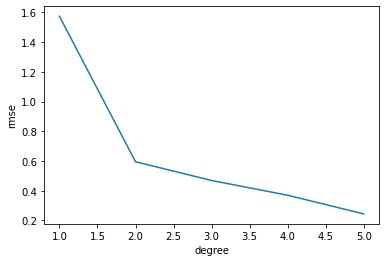

In [52]:
plt.plot(range(1,6) ,train_rmse_error[:5] , label="train rmse")

plt.ylabel("rmse")
plt.xlabel("degree")

plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

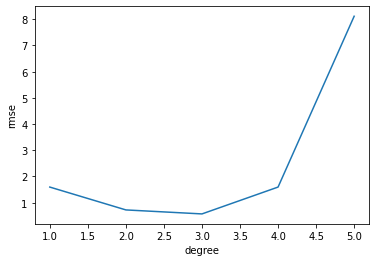

In [53]:
plt.plot(range(1,6) ,valid_rmse_error[:5] , label="train rmse")

plt.ylabel("rmse")
plt.xlabel("degree")

plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

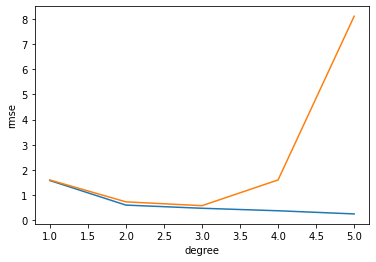

In [54]:
plt.plot(range(1,6) ,train_rmse_error[:5] , label="train rmse")
plt.plot(range(1,6) ,valid_rmse_error[:5] , label="train rmse")

plt.ylabel("rmse")
plt.xlabel("degree")

plt.legend

# Regularization
 limit amount of coeficients to cost function become zero or near zero
 RSS>>cost function 

Ridge Regression (L-2)norm: help us to reduce only the overfitting in the model while keeping all the features present in the model. it reduce the complexity of the model by shrinking the coefficents (for prevent of overfitting in test datas it change the degree of our line , the accuracy of our test data better than accuracy in train data)

Lasso Regression (L-1)norm:helps in reducing the problem of overfittingin the model as well as automatic feature selection

In [55]:
from sklearn.linear_model import Ridge

ridge_model=Ridge(alpha=1)
ridge_model.fit(x_train , y_train)

valid_pred1=ridge_model.predict(x_valid)


C:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


In [56]:
MAE=mean_absolute_error(y_valid , valid_pred1)
MSE=mean_squared_error(y_valid , valid_pred1)
RMSE=np.sqrt(mean_squared_error(y_valid, valid_pred1))

In [57]:
MAE

35.00908020965725

In [58]:
MSE

26681.810815541612

In [59]:
RMSE

163.34567890073373

In [60]:
from sklearn.linear_model import RidgeCV

ridge_cv_model=RidgeCV(alphas=(0.1 ,1.0 ,10) ,scoring="neg_mean_absolute_error")
ridge_cv_model.fit(x_train , y_train)

ridge_cv_model.alpha_  #which alpha is bether

valid_pred2=ridge_cv_model.predict(x_valid)

In [61]:
ridge_cv_model.alpha_

0.1

In [62]:
MAE=mean_absolute_error(y_valid , valid_pred2)
MSE=mean_squared_error(y_valid , valid_pred2)
RMSE=np.sqrt(mean_squared_error(y_valid, valid_pred2))

In [63]:
MAE

649.53573886362

In [64]:
MSE

11278326.556530071

In [65]:
RMSE

3358.3219852375787

# Lasso

In [66]:
from sklearn.linear_model import Lasso

In [67]:
lasso_model=Lasso(alpha=1 )
lasso_model.fit(x_train , y_train)
lasso_pred=lasso_model.predict(x_valid)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.223e+01, tolerance: 3.674e-01
  model = cd_fast.enet_coordinate_descent(


In [68]:
MAE=mean_absolute_error(y_valid , lasso_pred)
MSE=mean_squared_error(y_valid , lasso_pred)
RMSE=np.sqrt(mean_squared_error(y_valid, lasso_pred))

In [69]:
MAE

0.6827794551054105

In [70]:
MSE

3.581390715424287

In [71]:
RMSE

1.8924562651285464

In [72]:
from sklearn.linear_model import LassoCV

In [73]:
lasso_model=LassoCV(eps=0.1 , n_alphas=100 , cv=5 , max_iter=500 )#eps=interval  , n=number of alpgas , cv=cross fold validation  , max_iter=number of checking
lasso_model.fit(x_train , y_train)

LassoCV(cv=5, eps=0.1, max_iter=500)

In [74]:
lasso_model.alpha_

8.150397290070825e+20

In [75]:
lasso_pred_cv=lasso_model.predict(x_valid)

In [76]:
MAE=mean_absolute_error(y_valid , lasso_pred_cv)
MSE=mean_squared_error(y_valid , lasso_pred_cv)
RMSE=np.sqrt(mean_squared_error(y_valid, lasso_pred_cv))

In [77]:
MAE

4.132114876896043

In [78]:
MSE

23.69461775575069

In [79]:
RMSE

4.867711757669171

# ElasticNetCV
  (L-2) 0 <Elasticratio< 1 (L-1)  better to be near 1(lasso)

In [80]:
from sklearn.linear_model import ElasticNetCV

In [81]:
enc_model=ElasticNetCV(l1_ratio=[0.1 , 0.5 ,0.7 ,0.9 ,0.95 ,0.99 ,1] , eps=0.001 , n_alphas=100 , max_iter=100000)
enc_model.fit(x_train , y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=100000)

In [82]:
enc_model.l1_ratio_

0.1

In [83]:
enc_valid_pred=enc_model.predict(x_valid)

In [84]:
MAE=mean_absolute_error(y_valid , lasso_pred_cv)
MSE=mean_squared_error(y_valid , lasso_pred_cv)
RMSE=np.sqrt(mean_squared_error(y_valid, lasso_pred_cv))

In [85]:
MAE

4.132114876896043

In [86]:
MSE

23.69461775575069

In [87]:
RMSE

4.867711757669171

In [90]:
#testing our data by polynomial
y_hat_2=reg1.predict(x_test)

In [91]:
#testing our data by redge
test_pred2=ridge_cv_model.predict(x_test)

In [92]:
#testing our data by lasso
lasso_pred_cv1=lasso_model.predict(x_test)

In [93]:
#testing our data by ElasticNetCV
enc_valid_pred1=enc_model.predict(x_test)

<AxesSubplot:xlabel='sales', ylabel='Density'>

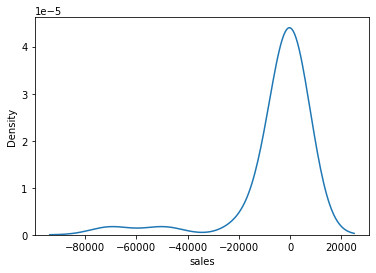

In [94]:
sns.kdeplot(y_test-y_hat_2)

<AxesSubplot:xlabel='sales', ylabel='Density'>

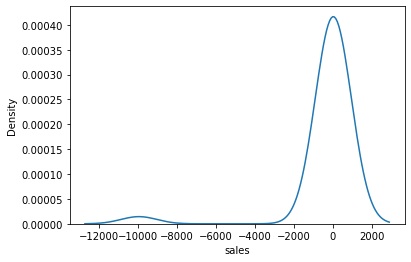

In [95]:
sns.kdeplot(y_test-test_pred2)

<AxesSubplot:xlabel='sales', ylabel='Density'>

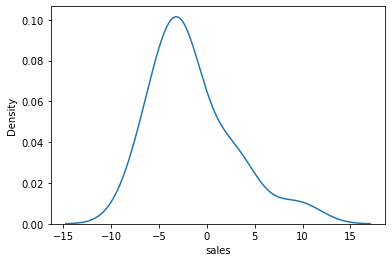

In [96]:
sns.kdeplot(y_test-lasso_pred_cv1)

<AxesSubplot:xlabel='sales', ylabel='Density'>

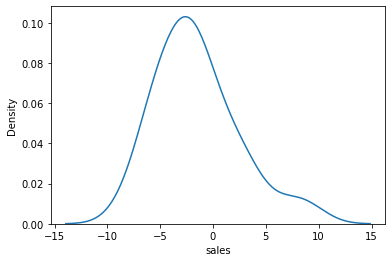

In [97]:
sns.kdeplot(y_test-enc_valid_pred1)